# Final Project: SVM on Heart Failure Prediction

In this project I used SVMs for predicting whether or not patients are at risk for Cardiovascular (Heart) Disease. Cardiovascular Disease is the number 1 cause of death, taking over 659,000 lives each year in the United States alone according to the [CDC](https://www.cdc.gov/heartdisease/facts.htm).

People living currently with Cardiovascular Disease or are at high risk of Cardiovascular Disease need a early detection method, where in machine learning can help.


Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#The Data

The data was downloaded from [kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction) \

\

**Feature Information** \

**Age**: age of the patient [years] \

**Sex**: sex of the patient [M: Male, F: Female] \

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, **NAP**: Non-Anginal Pain, ASY: Asymptomatic] \

**RestingBP**: resting blood pressure [mm Hg] \

**Cholesterol**: serum cholesterol [mm/dl] \

**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] \

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] \

**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202] \

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No] \

**Oldpeak**: oldpeak = ST [Numeric value measured in depression] \

**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] \

**HeartDisease**: output class [1: heart disease, 0: Normal] \

\

**Source** \

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are: \


**Cleveland**: 303 observations \

**Hungarian**: 294 observations \

**Switzerland**: 123 observations \

**Long Beach VA**: 200 observations \

**Stalog (Heart) Data Set**: 270 observations \

**Total**: 1190 observations \

**Duplicated**: 272 observations \

**Final dataset**: 918 observations 

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


#Data Manipulation

In order to run a SVM model, we must change every non integer value to and corresponding number.

In [3]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
# Maps values that are not integers to integers

heart_df['Sex'].replace(['M','F'], [0,1], inplace=True)

heart_df['ChestPainType'].replace(['ASY', 'NAP', 'ATA', 'TA'], [0, 1, 2, 3], inplace=True)

heart_df['RestingECG'].replace(['Normal', 'LVH', 'ST'], [0, 1, 2], inplace=True)

heart_df['ExerciseAngina'].replace(['Y', 'N'], [0, 1], inplace=True)

heart_df['ST_Slope'].replace(['Flat', 'Up', 'Down'], [0, 1, 2], inplace=True)

heart_df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [5]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,1,0.0,1,0
1,49,1,1,160,180,0,0,156,1,1.0,0,1
2,37,0,2,130,283,0,2,98,1,0.0,1,0
3,48,1,0,138,214,0,0,108,0,1.5,0,1
4,54,0,1,150,195,0,0,122,1,0.0,1,0
5,39,0,1,120,339,0,0,170,1,0.0,1,0
6,45,1,2,130,237,0,0,170,1,0.0,1,0
7,54,0,2,110,208,0,0,142,1,0.0,1,0
8,37,0,0,140,207,0,0,130,0,1.5,0,1
9,48,1,2,120,284,0,0,120,1,0.0,1,0


#Data Analysis

Now that we have all the data as numbers we can analyze the Data much more clearly

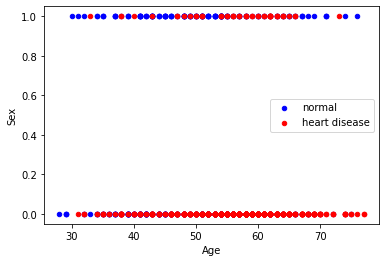

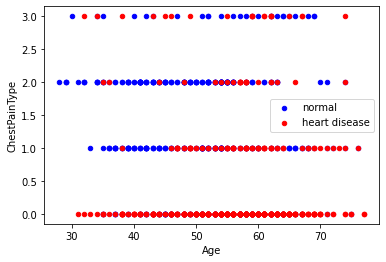

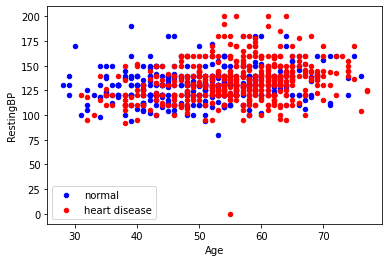

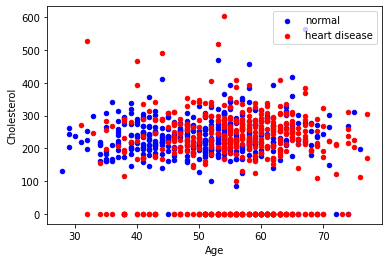

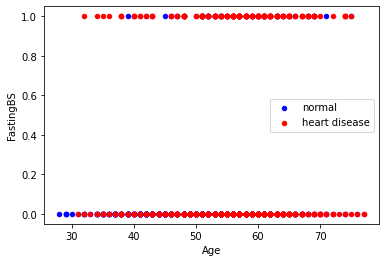

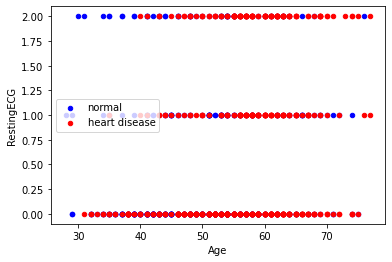

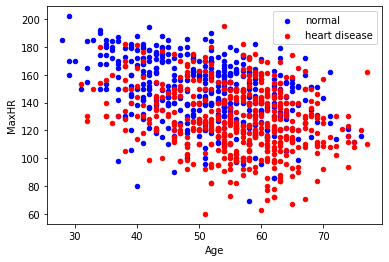

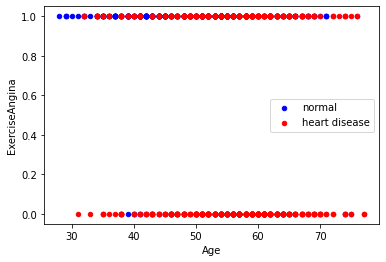

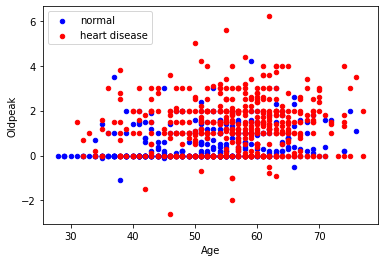

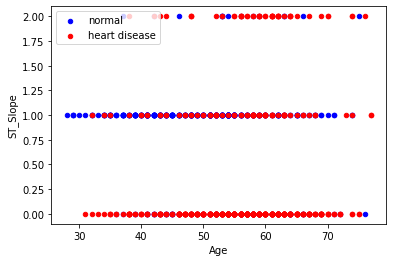

In [6]:
# Plot out every relationship with Age

normal_df = heart_df[heart_df['HeartDisease'] == 0]
heartdisease_df = heart_df[heart_df['HeartDisease'] == 1]

normal = normal_df.plot(kind='scatter', x='Age', y='Sex', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='Sex', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='ChestPainType', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='ChestPainType', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='RestingBP', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='RestingBP', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='Cholesterol', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='Cholesterol', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='FastingBS', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='FastingBS', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='RestingECG', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='RestingECG', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='MaxHR', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='MaxHR', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='ExerciseAngina', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='ExerciseAngina', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='Oldpeak', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='Oldpeak', color='red', label='heart disease', ax=normal)

normal = normal_df.plot(kind='scatter', x='Age', y='ST_Slope', color='blue', label='normal')
heartdisease_df.plot(kind='scatter', x='Age', y='ST_Slope', color='red', label='heart disease', ax=normal)

#Run the SVM model

Now that we have looked further into the data we can now attempt to train the model and test it.

In [7]:
heart_df.columns

# Feature Data
feature_df = heart_df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

# Feature Data
X = np.array(feature_df)

# Target Data
y = np.array(heart_df['HeartDisease'])

In [8]:
from sklearn.model_selection import train_test_split

# Splits up training and testing data to work with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [9]:
from sklearn import svm

# Linear SVM
classifier = svm.SVC(kernel="linear",C=10,gamma='auto',verbose=10)
classifier.fit(X_train, y_train)

# Fits testing data
y_predict = classifier.predict(X_test)

[LibSVM]

#Results

In [10]:
from sklearn.metrics import classification_report

# Prints out the accuracy of this SVM model
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        88
           1       0.86      0.94      0.90        96

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



92% accurate detecting for not at risk \
86% accurate detecting for risk

In [21]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('SVM on Heart Disease.ipynb')